In [1]:
import numpy as np
import os,shutil
import keras 
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [2]:
img_gen = ImageDataGenerator(rescale=1/255.0,
                               rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.3,
                              horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1/255.0)

In [3]:
train_gen = img_gen.flow_from_directory("../datasets/tiny-imagenet-200/train/",
                                        target_size=((224,224)),
                                        class_mode='categorical',
                                       batch_size=128)

Found 100000 images belonging to 200 classes.


In [4]:
# val_gen = img_gen.flow_from_directory("../datasets/tiny-imagenet-200/val/",
#                                         target_size=((224,224)),
#                                         class_mode='categorical',
#                                        batch_size=128)

In [5]:
class_ids = train_gen.class_indices

(128, 224, 224, 3) (128, 200)


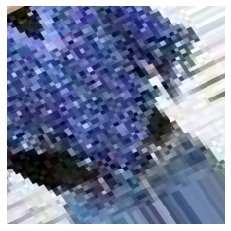

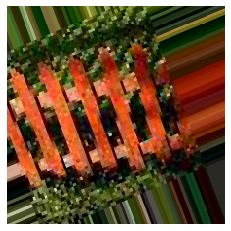

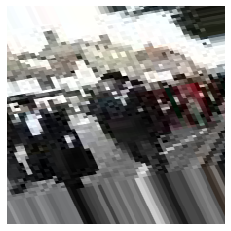

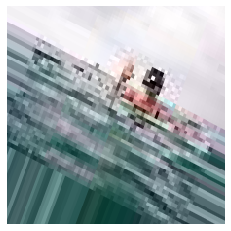

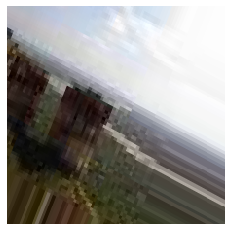

In [6]:
for x,y in train_gen:
    print(x.shape,y.shape)
    for i in range(5):
        plt.figure()
        plt.imshow(x[i])
        plt.axis('off')
    break

In [7]:
# def load_validtion_data(target_size,no_of_classes):
#     with open(os.path.join("../datasets/tiny-imagenet-200/val/","val_annotations.txt")) as f:
#         lines = f.readlines()
#         m = len(lines)
#         X = np.empty((m,*target_size,3))
#         y = np.empty(m,dtype = int)
#         for i,line in enumerate(lines):
#             tokens = line.split()
#             img_name = tokens[0]
#             img_label = tokens[1]
#             img_url = os.path.join("../datasets/tiny-imagenet-200/val/images",img_name)
#             img = image.load_img(img_url)
#             img = img.resize(target_size)
#             X[i,] = np.array(img,dtype = np.float32)/255.0
#             img.close()
#             y[i] = class_ids[img_label]
#     return X,to_categorical(y,num_classes=no_of_classes)

In [8]:
# X_val,y_val = load_validtion_data((224,224),200)

In [9]:
# def process_data():
#     with open(os.path.join("../datasets/tiny-imagenet-200/val/","val_annotations.txt")) as f:
#         lines = f.readlines()
#         for i,line in enumerate(lines):
#             tokens = line.split()
#             img_name = tokens[0]
#             img_label = tokens[1]
#             path = "../datasets/tiny-imagenet-200/val/" + img_label
#             if not os.path.isdir(path):
#                 os.mkdir(path)
#             src = os.path.join("../datasets/tiny-imagenet-200/val/images",img_name)
#             dst = os.path.join(path,img_name)
#             shutil.move(src,dst)

In [10]:
# process_data()

In [11]:
val_gen = img_gen.flow_from_directory("../datasets/tiny-imagenet-200/val/",
                                        target_size=((224,224)),
                                        class_mode='categorical',
                                       batch_size=128)

Found 10000 images belonging to 201 classes.


In [21]:
path = "../datasets/tiny-imagenet-200/val/"
folders = os.listdir(path)

In [23]:
for f in folders:
    path2 = "../datasets/tiny-imagenet-200/val/" + f
    path_image = path2 + "/images"
    if not os.path.isdir(path_image):
        os.mkdir(path_image)
    for img in os.listdir(path2):
        src = os.path.join(path2,img)
        dst = os.path.join(path_image,img)
        shutil.move(src,dst)

../datasets/tiny-imagenet-200/val/n04149813/images
